### **COLOR CHANNEL STATISTICS:**
* **Compute mean and standard deviation for each channel of an image, to quantify and represent the color distribution of an image**.
* Therefore, **if two images have similar mean and standard deviations**, we can **assume that these images have similar color distributions**.

Mounted at /content/drive


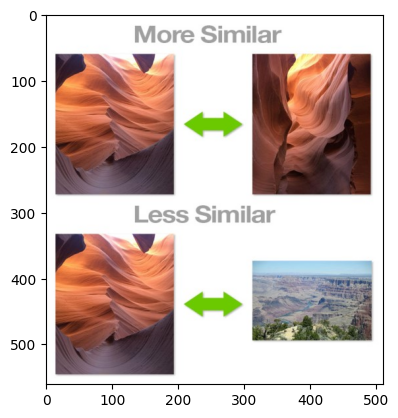

In [1]:
# prompt: add an image from google drive and display it

from google.colab import drive
drive.mount('/content/drive')

# Load the image from Google Drive
image_path = '/content/drive/MyDrive/MIT/Work/Machine_Learning/Google_Colab/Machine_Learning/Image_Descriptors/Image_Descriptors_Color_Channel_Statistics/CCS.jpg'

# Import necessary libraries
import matplotlib.pyplot as plt

# Read the image
image = plt.imread(image_path)

# Display the image
plt.imshow(image)
plt.show()

* The **color channel image descriptor** can be broken down into **three steps**,
  1.   **Separate the input image into its respective channels**. For an RGB image, we want to examine each of the Red, Green, and Blue channels, independently.
  2.   **Compute various statistics for each channel**, such as mean, standard deviation, skewness (deviation), and kurtosis (Sharpness).
  3.   **Concatenate the statistics together to form a “list”** of statistics for each color channel — this becomes our feature vector.

In [2]:
# import the necessary packages
# the distance  sub-module of SciPy contains many distance metrics and similarity functions that
# we can use to compute the distance/similarity between two feature vectors
# In this particular example we’ll be using the Euclidean distance, which is pretty much the de
# facto standard when it comes to computing the distance between two points in a Euclidean
# space. Given two input vectors, p and q,the Euclidean distance simply takes the sum of squared difference
# between each entry in the p and q vectors, and finally takes the square-root of this sum.
# A larger Euclidean distance implies that the two points are farther away from each other in a
# Euclidean space. A smaller Euclidean distance implies that the two points are closer
# together in a Euclidean space, with a distance of 0 implying that the points are identical.
from scipy.spatial import distance as dist
from google.colab.patches import cv2_imshow
from imutils import paths
import numpy as np
import cv2

In [4]:
# grab the list of image paths from our "dinos" directory.
# The "dinos"  directory contains the four images of the T-Rex
# initialize the index to store the image filename and feature vector
# Python dictionary (basically a Hash Table) called index.
# It’s very common to use dictionaries/Hash Tables when extracting features from images.
# This is because each input image is unique; therefore, we can use a unique key (such as the
# filename or UUID) as the key to our dictionary.
# As for the value of the dictionary, that will simply be our feature vector.
# Again, by using a dictionary data structure we are able to use the (unique) image filename as
# the key and the feature vector extracted from the image as the value.
imagePaths = sorted(list(paths.list_images("/content/sample_data/dinos")))
index = {}
print (imagePaths)

['/content/sample_data/dinos/trex_01.png', '/content/sample_data/dinos/trex_02.png', '/content/sample_data/dinos/trex_03.png', '/content/sample_data/dinos/trex_04.png']


In [ ]:
# loop over the image paths
for imagePath in imagePaths:
	# load the image and extract the filename
	image = cv2.imread(imagePath)
	print (imagePath)

	# Split the image path into a list of directories and the filename.
	parts = imagePath.split("/")

	# Get the last item in the list, which is the filename.
	filename = parts[-1]
	print (filename)

	# extract the mean and standard deviation from each channel of the BGR image, then
  # update the index with the feature vector
	# In this case, our feature vector consists of the means and standard deviations,
  # allowing us to characterize the color distribution of our images.
	(means, stds) = cv2.meanStdDev(image)
	features = np.concatenate([means, stds]).flatten()
	print (features)

	index[filename] = features

/content/sample_data/dinos/trex_01.png
trex_01.png
[76.03307116 55.01238202 41.61382022 32.98752426 22.0747736  16.27044689]
/content/sample_data/dinos/trex_02.png
trex_02.png
[56.31240892 38.36222305 27.71571747 33.00606454 21.52153756 14.50849672]
/content/sample_data/dinos/trex_03.png
trex_03.png
[ 62.94326277  77.64663504 109.99240876  44.94489976  42.65870807
  49.03285656]
/content/sample_data/dinos/trex_04.png
trex_04.png
[69.88696654 48.53405948 39.09354647 20.07237176 15.29575322 16.37005903]


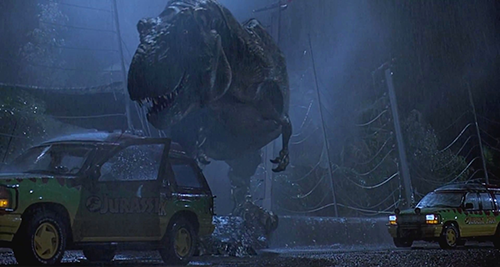

['trex_01.png', 'trex_02.png', 'trex_03.png', 'trex_04.png']


In [ ]:
# display the query image and grab the sorted keys of the index dictionary
# we’ll be using the trex_01.png  image as our query image — all other images in our dataset,
# (i.e. trex_02.png , trex_03.png , and trex_04.png ) will be compared to trex_01.png .
query = cv2.imread(imagePaths[0])
cv2_imshow(query)
keys = sorted(index.keys())
cv2.waitKey(0)
cv2.destroyAllWindows()
print(keys)

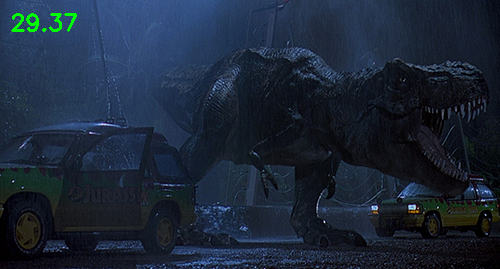

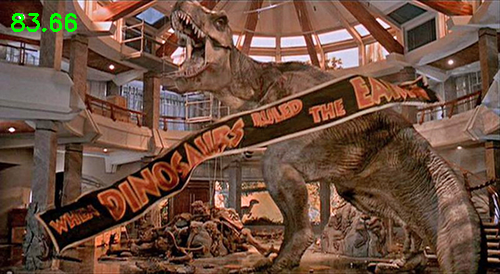

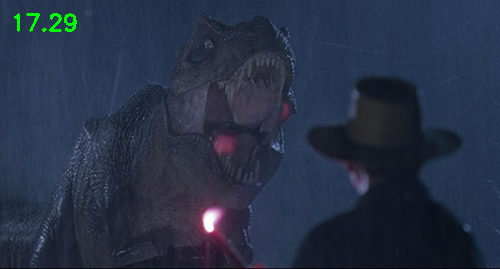

In [ ]:
# loop over the filenames in the dictionary
for (i, k) in enumerate(keys):
    # if this is the query image, ignore it
    # If the current image in the loop is our query image, we simply ignore it and continue looping.
	if k == "trex_01.png":
		continue

	# load the current image and compute the Euclidean distance between the query image (i.e. the
    # 1st image) and the current image
	# the dist.euclidean  function to compute the Euclidean distance between the query image
    # feature vector and the feature vectors in our dataset. As I mentioned above, similar images
    # will have a smaller Euclidean distance, whereas less similar images will have
    #a larger Euclidean distance.
	image = cv2.imread(imagePaths[i])
	d = dist.euclidean(index["trex_01.png"], index[k])
	# display the distance between the query image and the current image
	cv2.putText(image, "%.2f" % (d), (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0, 255, 0), 2)
	cv2_imshow(image)
	# wait for a keypress
	cv2.waitKey(0)
cv2.destroyAllWindows()